## SECTION C

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
fashion_mnist_train = pd.read_csv('Fashion-MNIST/fashion-mnist_train.csv')
fashion_mnist_test = pd.read_csv('Fashion-MNIST/fashion-mnist_test.csv')

In [3]:
fashion_mnist_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_mnist_train.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [5]:
fashion_mnist_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
fashion_mnist_test.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [7]:
print(fashion_mnist_train.info())
print(fashion_mnist_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB
None


In [8]:
print(fashion_mnist_train['label'].unique())
print(fashion_mnist_test['label'].unique())

[2 9 6 0 3 4 5 8 7 1]
[0 1 2 3 8 6 5 4 7 9]


The images belong to 10 unique categories.

In [9]:
train = fashion_mnist_train.head(8000)
test = fashion_mnist_test.head(2000)

In [10]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7996,4,0,0,0,0,0,0,0,0,0,...,3,0,56,201,194,144,0,0,0,0
7997,6,0,0,0,0,0,0,1,71,163,...,80,50,39,0,0,0,0,0,0,0
7998,4,0,0,0,0,0,0,0,0,25,...,0,0,171,174,173,105,0,0,0,0


In [11]:
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2,0,0,0,0,0,0,0,0,1,...,0,0,0,132,158,68,0,0,0,0
1996,5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,72,77,86,46,0
1997,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,139,182,120,0,0,0
1998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
X_train = train.drop('label', axis=1)
y_train = train['label']

X_test = test.drop('label', axis=1)
y_test = test['label']

print(X_train.shape)
print(y_train.shape) 
print(X_test.shape)
print(y_test.shape)

(8000, 784)
(8000,)
(2000, 784)
(2000,)


<h3 align='center'>Part 1</h3>

In [13]:
print(X_train.max().max())
print(X_train.min().min())

print(X_test.max().max())
print(X_test.min().min())

255
0
255
0


In [103]:
X_train = X_train / 255
X_test = X_test / 255

# X_train = X_train.values.reshape(-1, 28, 28, 1)
# X_test = X_test.values.reshape(-1, 28, 28, 1)

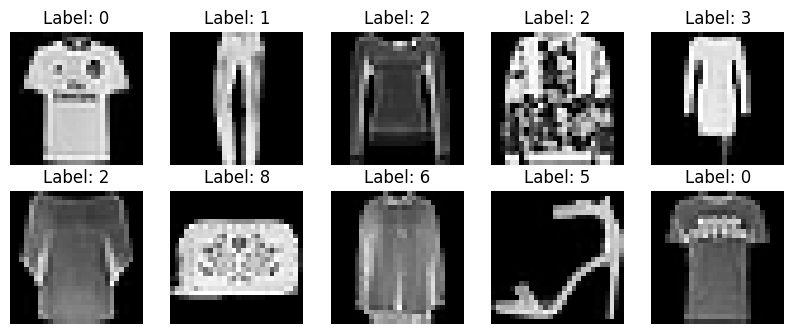

In [15]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_test.iloc[i]}")
    plt.axis('off')
plt.show()

<h3 align='center'>Part 2</h3>

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss

X_train_main, X_val, y_train_main, y_val = train_test_split(X_train, y_train, test_size=800, random_state=42)

activation_functions = ['logistic', 'tanh', 'relu', 'identity']

history = {activation: {'train_loss': [], 'val_loss': [], 'test_loss': []} for activation in activation_functions}

for activation in activation_functions:
    mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=100, solver='adam', 
                        batch_size=128, learning_rate_init=2e-5, activation=activation, random_state=42)
    for epoch in range(100):
        mlp.partial_fit(X_train_main, y_train_main, classes=np.unique(y_train))
        train_loss = log_loss(y_train_main, mlp.predict_proba(X_train_main))
        val_loss = log_loss(y_val, mlp.predict_proba(X_val))
        test_loss = log_loss(y_test, mlp.predict_proba(X_test))
        history[activation]['train_loss'].append(train_loss)
        history[activation]['val_loss'].append(val_loss)
        history[activation]['test_loss'].append(test_loss)
        if epoch % 20 == 0:
            print(f'{activation} : {epoch}')


logistic : 0
logistic : 20
logistic : 40
logistic : 60
logistic : 80
tanh : 0
tanh : 20
tanh : 40
tanh : 60
tanh : 80
relu : 0
relu : 20
relu : 40
relu : 60
relu : 80
identity : 0
identity : 20
identity : 40
identity : 60
identity : 80


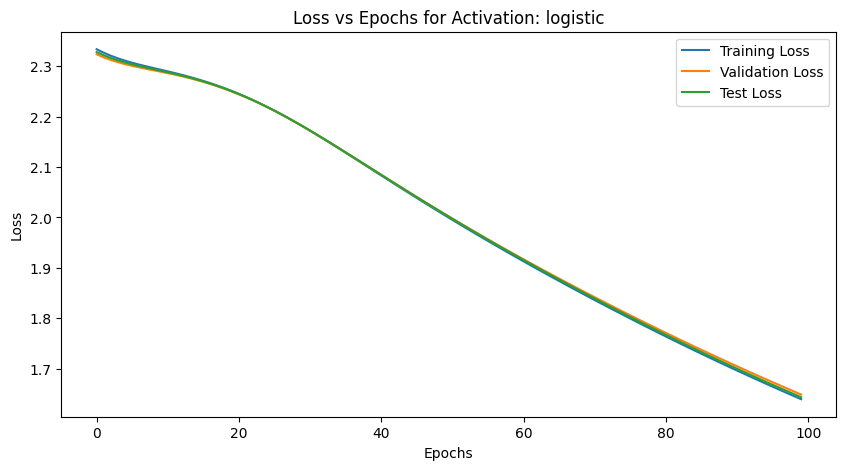

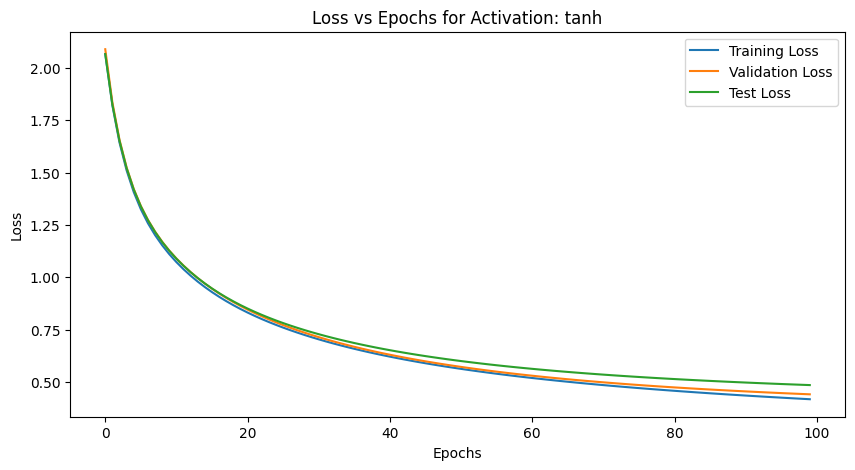

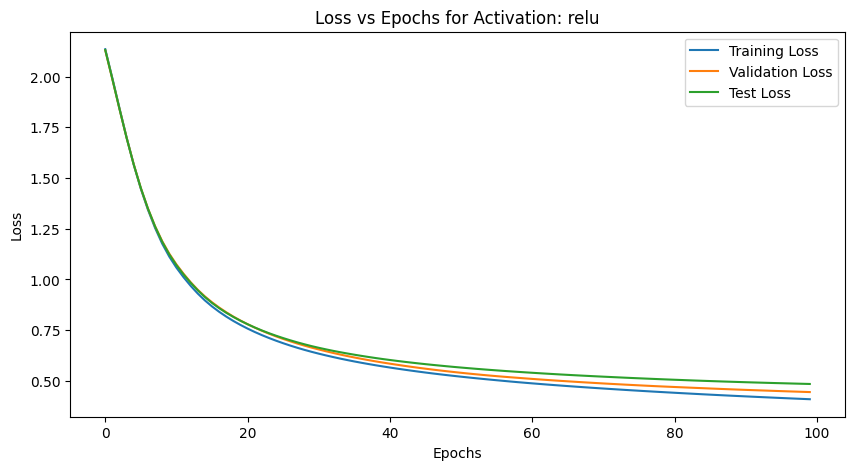

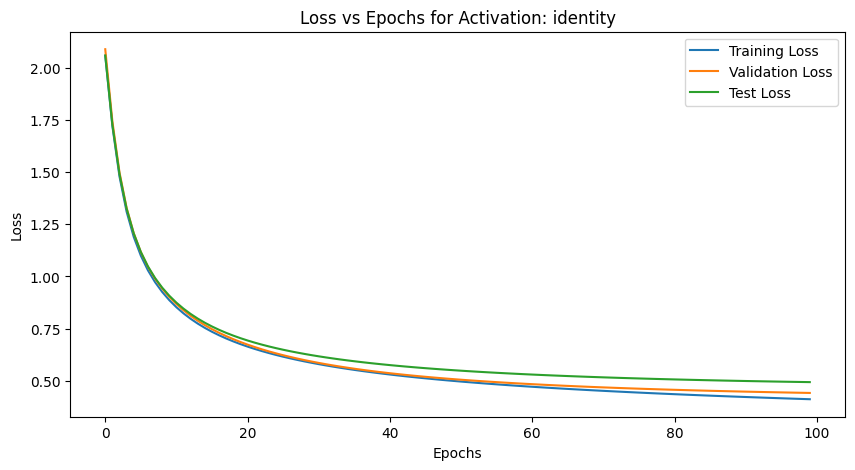

In [17]:
for activation in activation_functions:
    plt.figure(figsize=(10, 5))
    plt.plot(history[activation]['train_loss'], label="Training Loss")
    plt.plot(history[activation]['val_loss'], label="Validation Loss")
    plt.plot(history[activation]['test_loss'], label="Test Loss")
    plt.title(f"Loss vs Epochs for Activation: {activation}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


In [18]:
test_accuracies = {}
for activation in activation_functions:
    mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=100, solver='adam', 
                        batch_size=128, learning_rate_init=2e-5, activation=activation, random_state=42)
    mlp.fit(X_train, y_train)
    test_accuracy = mlp.score(X_test, y_test)
    test_accuracies[activation] = test_accuracy
    print(f'{activation} : done')

logistic : done
tanh : done
relu : done
identity : done


In [19]:
for activation in activation_functions:
    print(f'Validation Loss ({activation}): {history[activation]["val_loss"][-1]:.4f}')

for activation in activation_functions:
    print(f'Test Loss ({activation}): {history[activation]["test_loss"][-1]:.4f}')

for activation, accuracy in test_accuracies.items():
    print(f'Test Accuracy ({activation}): {accuracy:.4f}')

Validation Loss (logistic): 1.6488
Validation Loss (tanh): 0.4419
Validation Loss (relu): 0.4452
Validation Loss (identity): 0.4412
Test Loss (logistic): 1.6435
Test Loss (tanh): 0.4859
Test Loss (relu): 0.4851
Test Loss (identity): 0.4931
Test Accuracy (logistic): 0.4475
Test Accuracy (tanh): 0.8355
Test Accuracy (relu): 0.8340
Test Accuracy (identity): 0.8250


<h3 align='center'>Part 3</h3>

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'solver': ['adam', 'sgd', 'lbfgs'],
    'learning_rate_init': [2e-5, 1e-4, 1e-3, 1e-2],
    'batch_size': [64, 128, 256]
}

mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='tanh', max_iter=100, random_state=42)

grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy', cv=3, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Hyperparameters: {'batch_size': 64, 'learning_rate_init': 0.001, 'solver': 'adam'}
Best Cross-Validation Accuracy: 0.8633


<h3 align='center'>Part 4</h3>

In [95]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

c, b, a = 128, 64, 32
layer_sizes = [c, b, a, b, c]

X_train_main, X_val, y_train_main, y_val = train_test_split(X_train, X_train, test_size=800, random_state=42)

mlp_relu = MLPRegressor(hidden_layer_sizes=layer_sizes, activation='relu', solver='adam', 
                        learning_rate_init=2e-5, max_iter=100, random_state=42)
mlp_identity = MLPRegressor(hidden_layer_sizes=layer_sizes, activation='identity', solver='adam', 
                        learning_rate_init=2e-5, max_iter=100, random_state=42)

history_relu = {'train_loss': [], 'val_loss': []}
history_identity = {'train_loss': [], 'val_loss': []}

for epoch in range(100):
    mlp_relu.partial_fit(X_train_main, X_train_main)
    mlp_identity.partial_fit(X_train_main, X_train_main)
    
    train_loss_relu = mean_squared_error(X_train_main, mlp_relu.predict(X_train_main))
    val_loss_relu = mean_squared_error(X_val, mlp_relu.predict(X_val))
    
    train_loss_identity = mean_squared_error(X_train_main, mlp_identity.predict(X_train_main))
    val_loss_identity = mean_squared_error(X_val, mlp_identity.predict(X_val))
    
    history_relu['train_loss'].append(train_loss_relu)
    history_relu['val_loss'].append(val_loss_relu)
    
    history_identity['train_loss'].append(train_loss_identity)
    history_identity['val_loss'].append(val_loss_identity)
    
    if epoch % 20 == 0:
        print(f'Epoch {epoch} : done')


Epoch 0 : done
Epoch 20 : done
Epoch 40 : done
Epoch 60 : done
Epoch 80 : done


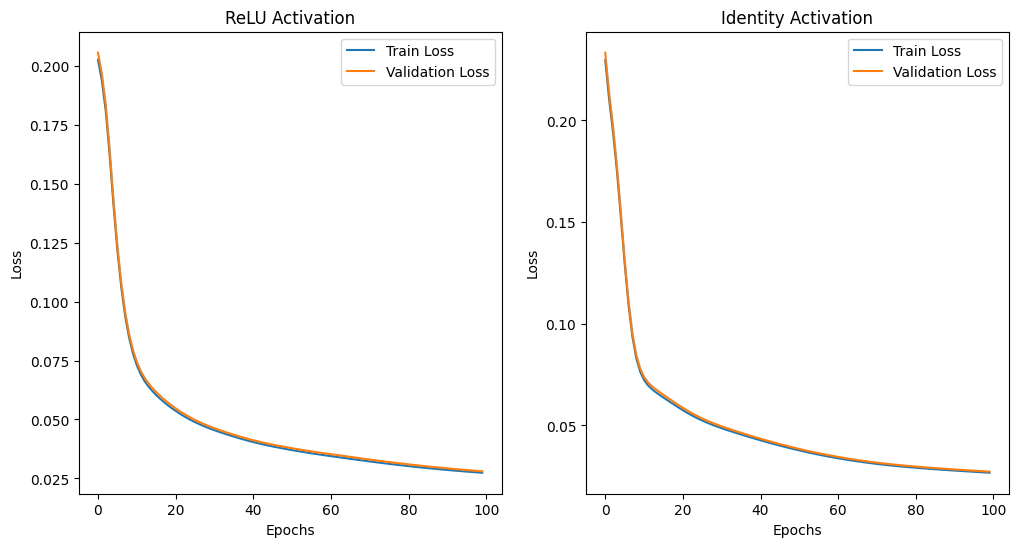

In [96]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_relu['train_loss'], label='Train Loss')
plt.plot(history_relu['val_loss'], label='Validation Loss')
plt.title('ReLU Activation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_identity['train_loss'], label='Train Loss')
plt.plot(history_identity['val_loss'], label='Validation Loss')
plt.title('Identity Activation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [26]:
print(f'Validation Loss (ReLU): {history_relu["val_loss"][-1]:.4f}')
print(f'Validation Loss (Identity): {history_identity["val_loss"][-1]:.4f}')   

Validation Loss (ReLU): 0.0280
Validation Loss (Identity): 0.0273


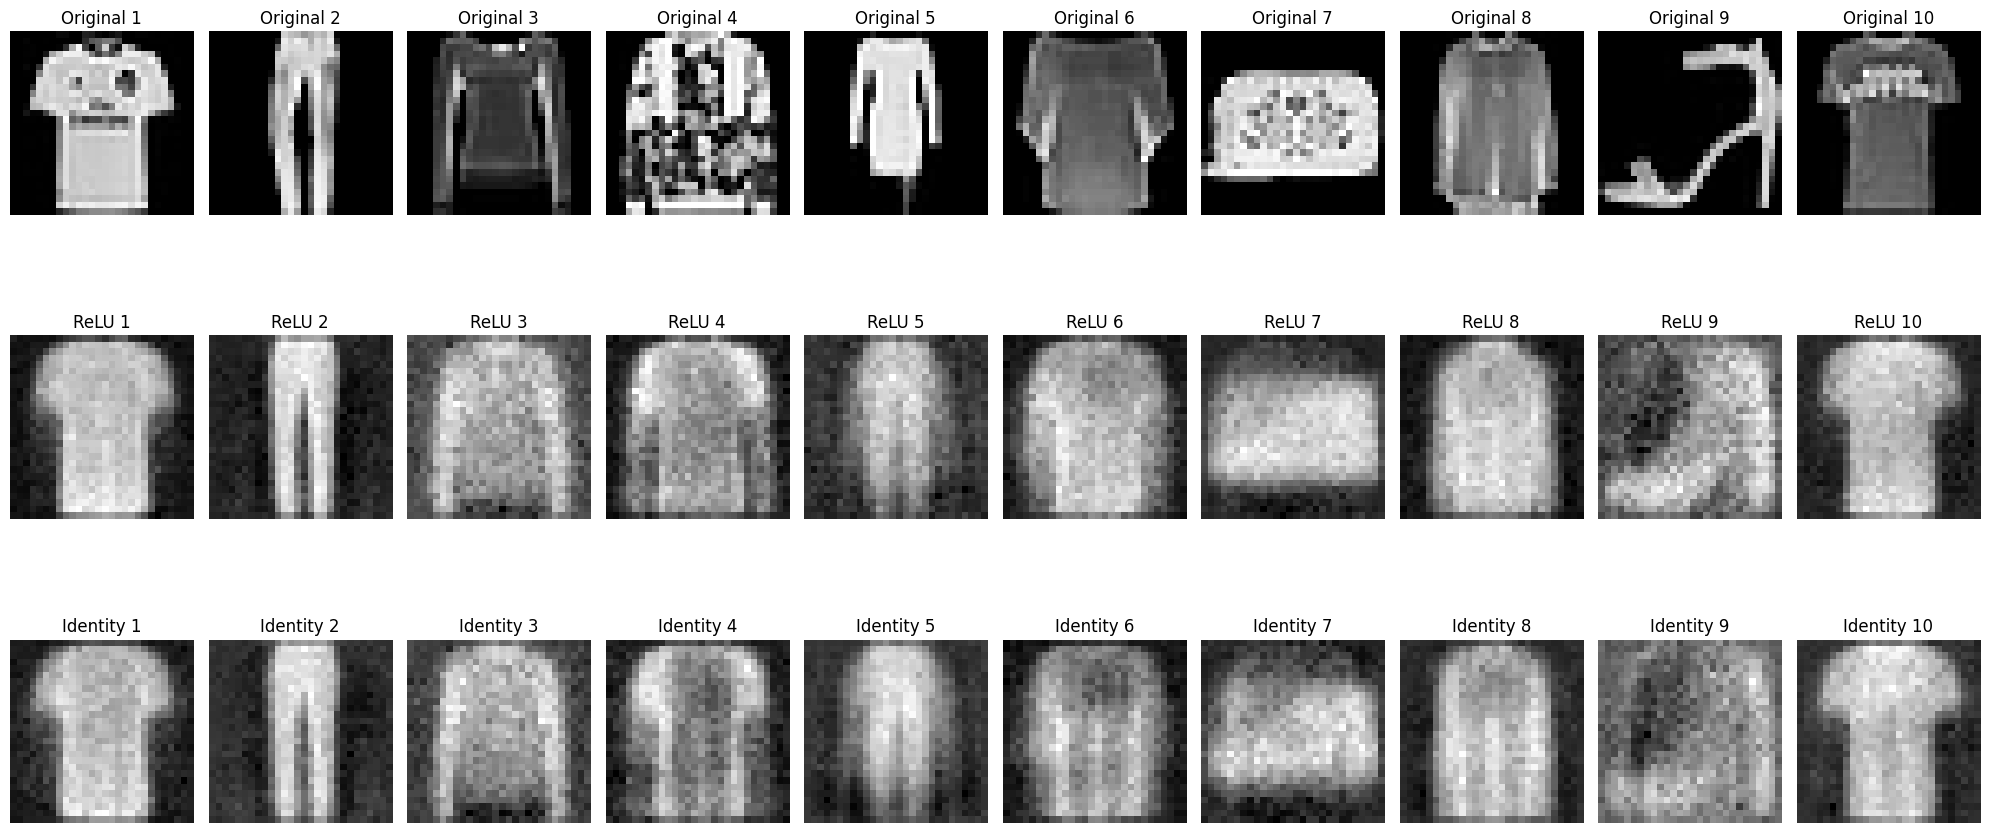

In [32]:
mlp_relu.fit(X_train, X_train)
mlp_identity.fit(X_train, X_train)

plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(3, 10, i + 1) 
    plt.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"Original {i+1}")
    plt.axis('off')
    
    plt.subplot(3, 10, i + 11)
    regenerated_image_relu = mlp_relu.predict([X_test.iloc[i].values])[0].reshape(28, 28)
    plt.imshow(regenerated_image_relu, cmap='gray')
    plt.title(f"ReLU {i+1}")
    plt.axis('off')
    
    plt.subplot(3, 10, i + 21)
    regenerated_image_identity = mlp_identity.predict([X_test.iloc[i].values])[0].reshape(28, 28)
    plt.imshow(regenerated_image_identity, cmap='gray')
    plt.title(f"Identity {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()


<h3 align='center'>Part 5</h3>

In [113]:
print(len(mlp_relu.coefs_))
print(mlp_relu.coefs_[0].shape)
print(mlp_relu.coefs_[1].shape)
print(mlp_relu.coefs_[2].shape)
print(mlp_relu.coefs_[3].shape)
print(mlp_relu.coefs_[4].shape)
print(mlp_relu.coefs_[5].shape)

6
(784, 128)
(128, 64)
(64, 32)
(32, 64)
(64, 128)
(128, 784)


In [122]:
def extract_features_relu(mlp, data):
    layer_data = data
    for i in range(3):
        layer_data = np.dot(layer_data, mlp.coefs_[i]) + mlp.intercepts_[i]
        layer_data = np.maximum(0, layer_data)
    return layer_data

def extract_features_identity(mlp, data):
    layer_data = data
    for i in range(3):
        layer_data = np.dot(layer_data, mlp.coefs_[i]) + mlp.intercepts_[i]
    return layer_data

X_train_features_relu = extract_features_relu(mlp_relu, X_train)
X_test_features_relu = extract_features_relu(mlp_relu, X_test)

X_train_features_identity = extract_features_identity(mlp_identity, X_train)
X_test_features_identity = extract_features_identity(mlp_identity, X_test)

def train_and_evaluate_mlp_classifier(X_train, X_test, y_train, y_test, a_size):
    mlp_classifier = MLPClassifier(hidden_layer_sizes=(a_size, a_size), max_iter=200, solver="adam", 
                            batch_size=128, activation= "tanh", learning_rate_init=2e-5, random_state=42)
    mlp_classifier.fit(X_train, y_train)
    train_accuracy = mlp_classifier.score(X_train, y_train)
    test_accuracy = mlp_classifier.score(X_test, y_test)
    return train_accuracy, test_accuracy

train_acc_relu, test_acc_relu = train_and_evaluate_mlp_classifier(X_train_features_relu, 
                    X_test_features_relu, y_train, y_test, 32)

train_acc_identity, test_acc_identity = train_and_evaluate_mlp_classifier(X_train_features_identity, 
                    X_test_features_identity, y_train, y_test, 32)

print("ReLU Activation - Train Accuracy:", train_acc_relu)
print("ReLU Activation - Test Accuracy:", test_acc_relu)
print("Identity Activation - Train Accuracy:", train_acc_identity)
print("Identity Activation - Test Accuracy:", test_acc_identity)


ReLU Activation - Train Accuracy: 0.730125
ReLU Activation - Test Accuracy: 0.72
Identity Activation - Train Accuracy: 0.730375
Identity Activation - Test Accuracy: 0.7365


In [124]:
# print(X_train_features_relu.shape)
# print(X_test_features_relu.shape)
# print(X_train_features_identity.shape)
# print(X_test_features_identity.shape)

(8000, 32)
(2000, 32)
(8000, 32)
(2000, 32)
